In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

In [12]:
imagesPath = 'trainData'
testPath = 'testData'
imgSize = 128

In [13]:
trainDatasetOriginal = tf.keras.utils.image_dataset_from_directory(
    directory=f"original/{imagesPath}",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(imgSize, imgSize),
    shuffle=True,
    seed=17,
    validation_split=0.3,
    subset="training",
    interpolation='bilinear',
)

valDatasetOriginal = tf.keras.utils.image_dataset_from_directory(
    directory=f"original/{imagesPath}",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(imgSize, imgSize),
    shuffle=True,
    seed=17,
    validation_split=0.3,
    subset="validation",
    interpolation='bilinear',
)

testDatasetOriginal = tf.keras.utils.image_dataset_from_directory(
    directory=f"original/{testPath}",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(imgSize, imgSize),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
)

testGalaxyOriginal = tf.keras.utils.image_dataset_from_directory(
    directory=f"galaktyki_test/original",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(imgSize, imgSize),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
)

Found 17380 files belonging to 4 classes.
Using 12166 files for training.
Found 17380 files belonging to 4 classes.
Using 5214 files for validation.
Found 5853 files belonging to 4 classes.
Found 20 files belonging to 4 classes.


In [14]:
nnOriginal = Sequential([
    Conv2D(filters=16, kernel_size=(4, 4), activation='relu',
           padding='same', input_shape=(imgSize, imgSize, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
           padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=32, activation='relu'),
    Dense(units=4, activation='softmax')
])

nnOriginal.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

tf.keras.utils.plot_model(nnOriginal, show_shapes=True)
nnOriginal.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 16)      784       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 32)               

Epoch 1/50
381/381 [==============================] - 15s 35ms/step - loss: 2.0522 - accuracy: 0.4493 - val_loss: 1.1015 - val_accuracy: 0.5526
Epoch 2/50
381/381 [==============================] - 12s 30ms/step - loss: 0.9281 - accuracy: 0.6255 - val_loss: 1.0490 - val_accuracy: 0.5692
Epoch 3/50
381/381 [==============================] - 12s 32ms/step - loss: 0.7079 - accuracy: 0.7227 - val_loss: 1.3271 - val_accuracy: 0.5322
Epoch 4/50
381/381 [==============================] - 12s 31ms/step - loss: 0.4999 - accuracy: 0.8117 - val_loss: 1.3860 - val_accuracy: 0.5453
Epoch 5/50
381/381 [==============================] - 13s 33ms/step - loss: 0.3626 - accuracy: 0.8668 - val_loss: 1.5547 - val_accuracy: 0.5650
Epoch 6/50
381/381 [==============================] - 13s 33ms/step - loss: 0.2660 - accuracy: 0.9051 - val_loss: 2.1469 - val_accuracy: 0.5422
Epoch 7/50
381/381 [==============================] - 13s 33ms/step - loss: 0.2571 - accuracy: 0.9083 - val_loss: 2.3133 - val_accuracy:

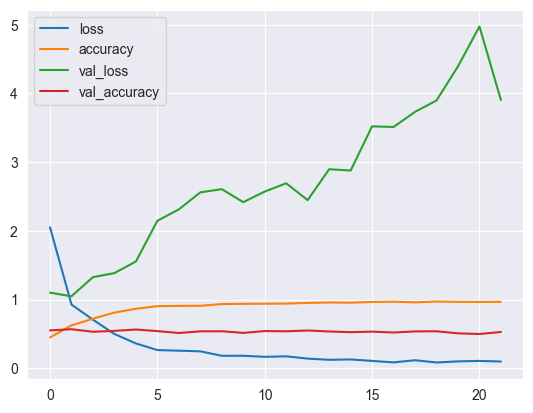

In [15]:
tf.config.get_visible_devices()
historia = nnOriginal.fit(trainDatasetOriginal,
                          epochs=50,
                          validation_data=valDatasetOriginal,
                          callbacks=[
                              tf.keras.callbacks.ModelCheckpoint('model_original_valacc.h5', save_best_only=True,
                                                                 monitor='val_accuracy'),
                              tf.keras.callbacks.ModelCheckpoint('model_original_valloss.h5', save_best_only=True,
                                                                 monitor='val_loss'),
                              tf.keras.callbacks.EarlyStopping(
                                  monitor='accuracy',
                                  patience=3,
                              )]

                          #verbose=0
                          )
nnOriginal.save('model_original.h5')
pd.DataFrame(historia.history).plot()
pd.DataFrame(historia.history).to_csv('historia_original.csv')

<AxesSubplot: >

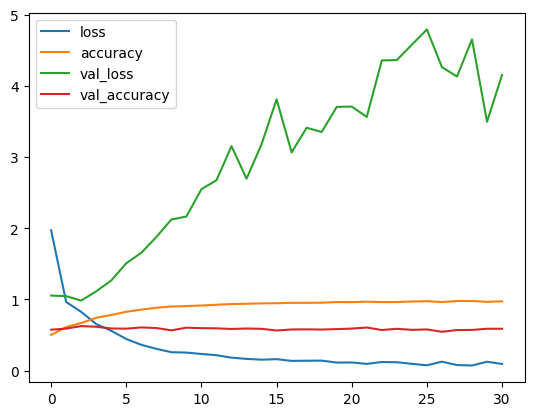

In [5]:
historia = pd.read_csv('historia_original.csv', usecols=['loss', 'accuracy', 'val_loss', 'val_accuracy'])
pd.DataFrame(historia).plot()

In [5]:
nnOriginal.load_weights('model_original.h5')
#nnOriginal.load_weights('model_original_valacc.h5')
#nnOriginal.load_weights('model_original_valloss.h5')

In [52]:
Y_original = np.concatenate([y for x, y in testDatasetOriginal], axis=0)
Y_pred = nnOriginal.predict(testDatasetOriginal)
Y_pred

183/183 [==============================] - 3s 15ms/step


array([[1.36091796e-04, 6.30677621e-10, 9.99813855e-01, 5.01175891e-05],
       [4.96835808e-13, 3.08836223e-09, 3.10901370e-12, 1.00000000e+00],
       [5.99373990e-08, 3.07804356e-07, 1.73952158e-10, 9.99999642e-01],
       ...,
       [1.92479952e-08, 3.97569791e-04, 3.50725969e-07, 9.99602020e-01],
       [8.05460848e-03, 4.85715002e-01, 5.06219566e-01, 1.08144932e-05],
       [1.03654871e-02, 9.00491793e-03, 1.10788136e-10, 9.80629623e-01]],
      dtype=float32)

In [53]:
Y_pred = np.argmax(Y_pred, axis=1)

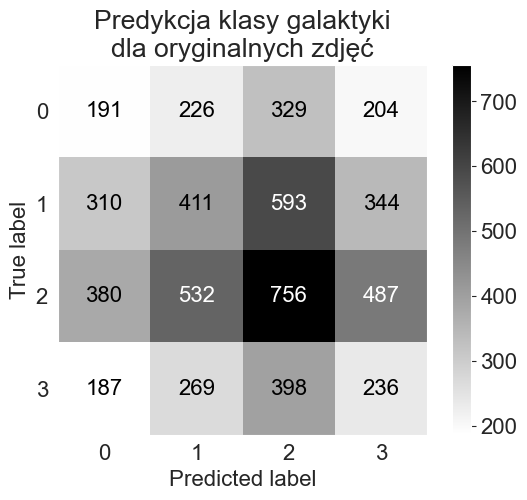

In [54]:

cm = confusion_matrix(Y_original, Y_pred, labels=np.unique(Y_original))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(Y_original))
disp.plot(cmap='gray_r')  # BuPu, bone_r
thicklabels = disp.ax_.get_xticklabels()
label = disp.ax_.get_xlabel()
disp.ax_.set(title='Predykcja klasy galaktyki\ndla oryginalnych zdjęć')
disp.ax_.grid(False)

381/381 [==============================] - 5s 12ms/step


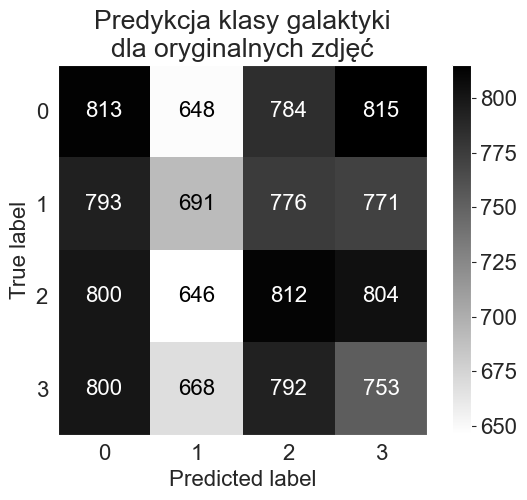

In [56]:
Y_original = np.concatenate([y for x, y in trainDatasetOriginal], axis=0)
Y_pred = nnOriginal.predict(trainDatasetOriginal)
Y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(Y_original, Y_pred, labels=np.unique(Y_original))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(Y_original))
disp.plot(cmap='gray_r')  # BuPu, bone_r
disp.ax_.set(title='Predykcja klasy galaktyki\ndla oryginalnych zdjęć')
disp.ax_.grid(False)

1/1 [==============================] - 0s 31ms/step


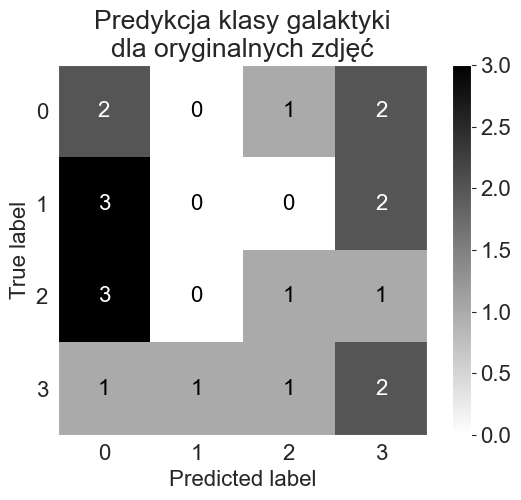

In [71]:
Y_original = np.concatenate([y for x, y in testGalaxyOriginal], axis=0)
Y_pred = nnOriginal.predict(testGalaxyOriginal)
Y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(Y_original, Y_pred, labels=np.unique(Y_original))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(Y_original))
disp.plot(cmap='gray_r')  # BuPu, bone_r
disp.ax_.set(title='Predykcja klasy galaktyki\ndla oryginalnych zdjęć')
disp.ax_.grid(False)

Histogram

In [26]:
trainDatasetHist = tf.keras.utils.image_dataset_from_directory(
    directory=f"histogram/{imagesPath}",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(imgSize, imgSize),
    shuffle=True,
    seed=17,
    validation_split=0.3,
    subset="training",
    interpolation='bilinear',
)

valDatasetHist = tf.keras.utils.image_dataset_from_directory(
    directory=f"histogram/{imagesPath}",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(imgSize, imgSize),
    shuffle=True,
    seed=17,
    validation_split=0.3,
    subset="validation",
    interpolation='bilinear',
)

testDatasetHist = tf.keras.utils.image_dataset_from_directory(
    directory=f"histogram/{testPath}",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(imgSize, imgSize),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
)

testGalaxyHist = tf.keras.utils.image_dataset_from_directory(
    directory=f"galaktyki_test/hist",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(imgSize, imgSize),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
)


Found 17380 files belonging to 4 classes.
Using 12166 files for training.
Found 17380 files belonging to 4 classes.
Using 5214 files for validation.
Found 5853 files belonging to 4 classes.
Found 20 files belonging to 4 classes.


In [27]:
nnHist = Sequential([
    Conv2D(filters=16, kernel_size=(4, 4), activation='relu',
           padding='same', input_shape=(imgSize, imgSize, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
           padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=32, activation='relu'),
    Dense(units=4, activation='softmax')
])

nnHist.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#tf.keras.utils.plot_model(nnHist, show_shapes=True)

Epoch 1/50
381/381 [==============================] - 12s 30ms/step - loss: 6.7295 - accuracy: 0.3381 - val_loss: 1.3215 - val_accuracy: 0.3567
Epoch 2/50
381/381 [==============================] - 14s 37ms/step - loss: 1.2956 - accuracy: 0.3742 - val_loss: 1.3021 - val_accuracy: 0.3615
Epoch 3/50
381/381 [==============================] - 12s 32ms/step - loss: 1.2701 - accuracy: 0.3860 - val_loss: 1.3043 - val_accuracy: 0.3615
Epoch 4/50
381/381 [==============================] - 13s 33ms/step - loss: 1.2178 - accuracy: 0.4243 - val_loss: 1.3693 - val_accuracy: 0.3266
Epoch 5/50
381/381 [==============================] - 13s 33ms/step - loss: 1.1384 - accuracy: 0.4809 - val_loss: 1.3732 - val_accuracy: 0.3648
Epoch 6/50
381/381 [==============================] - 13s 33ms/step - loss: 1.0066 - accuracy: 0.5599 - val_loss: 1.4397 - val_accuracy: 0.3450
Epoch 7/50
381/381 [==============================] - 14s 35ms/step - loss: 0.8306 - accuracy: 0.6544 - val_loss: 1.6673 - val_accuracy:

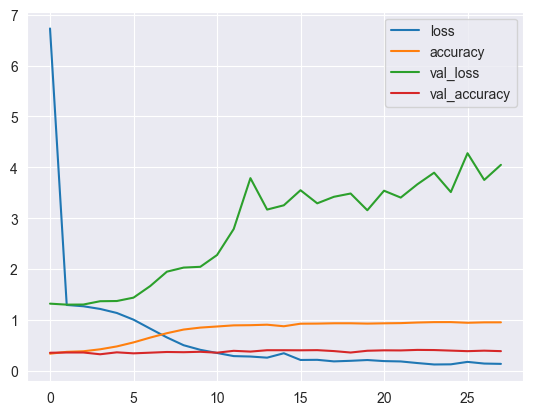

In [28]:
tf.config.get_visible_devices()
historia = nnHist.fit(trainDatasetHist,
                      epochs=50,
                      validation_data=valDatasetHist,
                      callbacks=[
                          tf.keras.callbacks.ModelCheckpoint('model_hist_valacc.h5', save_best_only=True,
                                                             monitor='val_accuracy'),
                          tf.keras.callbacks.ModelCheckpoint('model_hist_valloss.h5', save_best_only=True,
                                                             monitor='val_loss'),
                          tf.keras.callbacks.EarlyStopping(
                              monitor='accuracy',
                              patience=3,
                          )]

                      #verbose=0
                      )
nnHist.save('model_hist.h5')
pd.DataFrame(historia.history).plot()
pd.DataFrame(historia.history).to_csv('historia_hist.csv')

In [75]:
nnHist.load_weights('model_hist.h5')
#nnHist.load_weights('model_hist_valacc.h5')
#nnHist.load_weights('model_hist_valloss.h5')


183/183 [==============================] - 3s 13ms/step


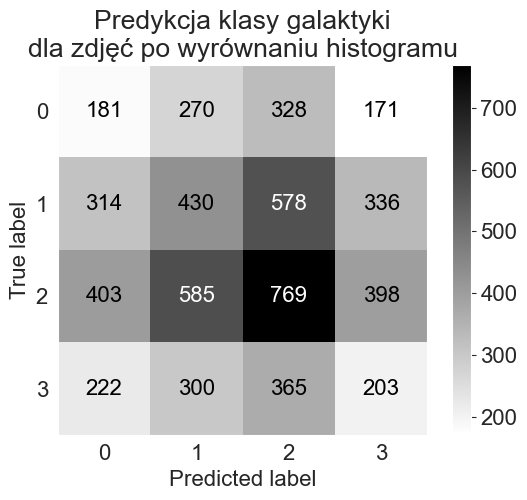

In [76]:
Y_original = np.concatenate([y for x, y in testDatasetHist], axis=0)
Y_pred = nnHist.predict(testDatasetHist)
Y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(Y_original, Y_pred, labels=np.unique(Y_original))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(Y_original))
disp.plot(cmap='gray_r')  # BuPu, bone_r
disp.ax_.set(title='Predykcja klasy galaktyki\ndla zdjęć po wyrównaniu histogramu')
disp.ax_.grid(False)

381/381 [==============================] - 5s 13ms/step


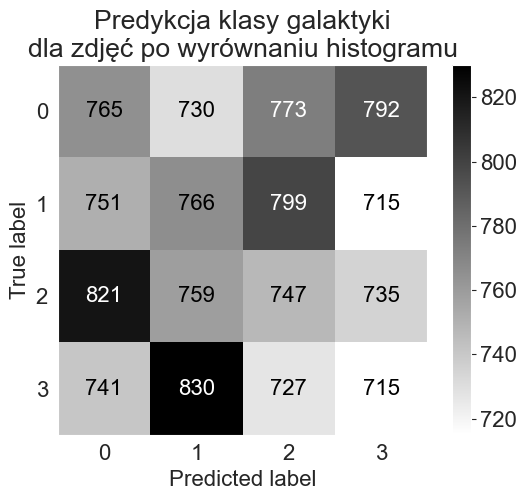

In [77]:
Y_original = np.concatenate([y for x, y in trainDatasetHist], axis=0)
Y_pred = nnHist.predict(trainDatasetHist)
Y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(Y_original, Y_pred, labels=np.unique(Y_original))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(Y_original))
disp.plot(cmap='gray_r')  # BuPu, bone_r
disp.ax_.set(title='Predykcja klasy galaktyki\ndla zdjęć po wyrównaniu histogramu')
disp.ax_.grid(False)

1/1 [==============================] - 0s 39ms/step


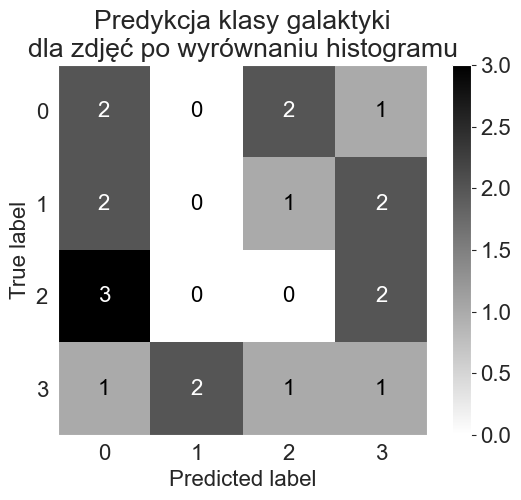

In [85]:
Y_original = np.concatenate([y for x, y in testGalaxyHist], axis=0)
Y_pred = nnHist.predict(testGalaxyHist)
Y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(Y_original, Y_pred, labels=np.unique(Y_original))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(Y_original))
disp.plot(cmap='gray_r')  # BuPu, bone_r
disp.ax_.set(title='Predykcja klasy galaktyki\ndla zdjęć po wyrównaniu histogramu')
disp.ax_.grid(False)

Filtr medianowy

In [80]:
trainDatasetFilter = tf.keras.utils.image_dataset_from_directory(
    directory=f"filter/{imagesPath}",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(imgSize, imgSize),
    shuffle=True,
    seed=17,
    validation_split=0.3,
    subset="training",
    interpolation='bilinear',
)

valDatasetFilter = tf.keras.utils.image_dataset_from_directory(
    directory=f"filter/{imagesPath}",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(imgSize, imgSize),
    shuffle=True,
    seed=17,
    validation_split=0.3,
    subset="validation",
    interpolation='bilinear',
)

testDatasetFilter = tf.keras.utils.image_dataset_from_directory(
    directory=f"filter/{testPath}",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(imgSize, imgSize),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
)

testGalaxyFilter = tf.keras.utils.image_dataset_from_directory(
    directory=f"galaktyki_test/filter",
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(imgSize, imgSize),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
)


Found 17380 files belonging to 4 classes.
Using 12166 files for training.
Found 17380 files belonging to 4 classes.
Using 5214 files for validation.
Found 5853 files belonging to 4 classes.
Found 20 files belonging to 4 classes.


In [33]:
nnFilter = Sequential([
    Conv2D(filters=16, kernel_size=(4, 4), activation='relu',
           padding='same', input_shape=(imgSize, imgSize, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
           padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=32, activation='relu'),
    Dense(units=4, activation='softmax')
])

nnFilter.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#tf.keras.utils.plot_model(nnFilter, show_shapes=True)

Epoch 1/50
381/381 [==============================] - 13s 32ms/step - loss: 3.0192 - accuracy: 0.3953 - val_loss: 1.0902 - val_accuracy: 0.5213
Epoch 2/50
381/381 [==============================] - 13s 35ms/step - loss: 1.0370 - accuracy: 0.5561 - val_loss: 1.0236 - val_accuracy: 0.5602
Epoch 3/50
381/381 [==============================] - 13s 34ms/step - loss: 0.9511 - accuracy: 0.5992 - val_loss: 0.9914 - val_accuracy: 0.5873
Epoch 4/50
381/381 [==============================] - 13s 34ms/step - loss: 0.8986 - accuracy: 0.6350 - val_loss: 0.9811 - val_accuracy: 0.6068
Epoch 5/50
381/381 [==============================] - 14s 36ms/step - loss: 0.8365 - accuracy: 0.6674 - val_loss: 0.9731 - val_accuracy: 0.6203
Epoch 6/50
381/381 [==============================] - 13s 34ms/step - loss: 0.7625 - accuracy: 0.7053 - val_loss: 1.0228 - val_accuracy: 0.6007
Epoch 7/50
381/381 [==============================] - 12s 30ms/step - loss: 0.7103 - accuracy: 0.7266 - val_loss: 1.0169 - val_accuracy:

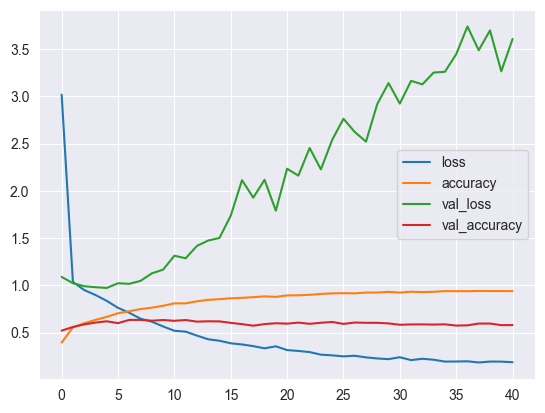

In [34]:
tf.config.get_visible_devices()
historia = nnFilter.fit(trainDatasetFilter,
                        epochs=50,
                        validation_data=valDatasetFilter,
                        callbacks=[
                            tf.keras.callbacks.ModelCheckpoint('model_filter_valacc.h5', save_best_only=True,
                                                               monitor='val_accuracy'),
                            tf.keras.callbacks.ModelCheckpoint('model_filter_valloss.h5', save_best_only=True,
                                                               monitor='val_loss'),
                            tf.keras.callbacks.EarlyStopping(
                                monitor='accuracy',
                                patience=3,
                            )]

                        #verbose=0
                        )
nnFilter.save('model_filter.h5')
pd.DataFrame(historia.history).plot()
pd.DataFrame(historia.history).to_csv('historia_filter.csv')

In [44]:
nnFilter.load_weights('model_filter.h5')
#nnFilter.load_weights('model_filter_valacc.h5')
#nnFilter.load_weights('model_filter_valloss.h5')

183/183 [==============================] - 2s 13ms/step


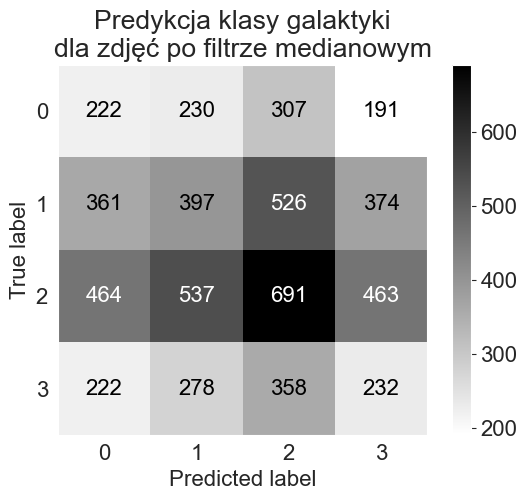

In [81]:
Y_original = np.concatenate([y for x, y in testDatasetFilter], axis=0)
Y_pred = nnFilter.predict(testDatasetFilter)
Y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(Y_original, Y_pred, labels=np.unique(Y_original))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(Y_original))
disp.plot(cmap='gray_r')  # BuPu, bone_r
disp.ax_.set(title='Predykcja klasy galaktyki\ndla zdjęć po filtrze medianowym')
disp.ax_.grid(False)

381/381 [==============================] - 5s 13ms/step


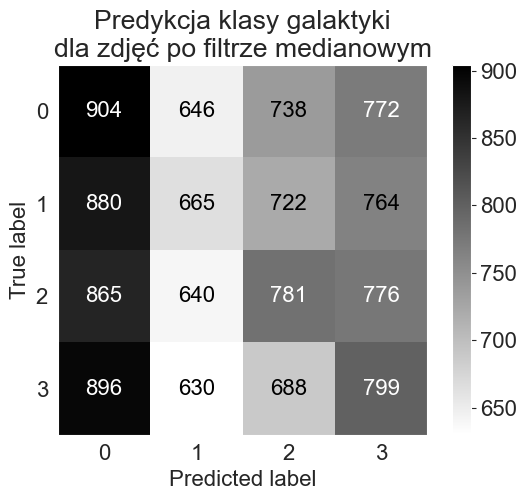

In [82]:
Y_original = np.concatenate([y for x, y in trainDatasetFilter], axis=0)
Y_pred = nnFilter.predict(trainDatasetFilter)
Y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(Y_original, Y_pred, labels=np.unique(Y_original))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(Y_original))
disp.plot(cmap='gray_r')  # BuPu, bone_r
disp.ax_.set(title='Predykcja klasy galaktyki\ndla zdjęć po filtrze medianowym')
disp.ax_.grid(False)

1/1 [==============================] - 0s 30ms/step


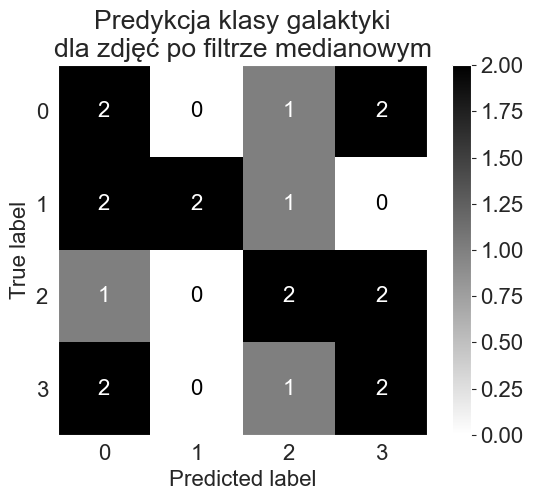

In [51]:
Y_original = np.concatenate([y for x, y in testGalaxyFilter], axis=0)
Y_pred = nnFilter.predict(testGalaxyFilter)
Y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(Y_original, Y_pred, labels=np.unique(Y_original))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(Y_original))
disp.plot(cmap='gray_r')  # BuPu, bone_r
disp.ax_.set(title='Predykcja klasy galaktyki\ndla zdjęć po filtrze medianowym')
disp.ax_.grid(False)

testowy, poprawić czcionki, usunąć grida, rysunek nr